In [2]:
# Data processing 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn import datasets

# Dimensionality reduction
from sklearn.decomposition import PCA

# Modeling
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hier
from sklearn.mixture import GaussianMixture

# Number of clusters
#from sklearn.metrics import silhouette_score

In [2]:
pip install pyspark

     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     -------------------------------------- 0.0/316.9 MB 640.0 kB/s eta 0:08:16
     -------------------------------------- 0.1/316.9 MB 787.7 kB/s eta 0:06:43
     ---------------------------------------- 0.5/316.9 MB 4.3 MB/s eta 0:01:15
     ---------------------------------------- 0.7/316.9 MB 4.3 MB/s eta 0:01:14
     ---------------------------------------- 1.9/316.9 MB 8.7 MB/s eta 0:00:37
      -------------------------------------- 4.1/316.9 MB 15.4 MB/s eta 0:00:21
      -------------------------------------- 4.2/316.9 MB 13.5 MB/s eta 0:00:24
      -------------------------------------- 6.8/316.9 MB 19.9 MB/s eta 0:00:16
     - ------------------------------------- 9.4/316.9 MB 24.0 MB/s eta 0:00:13
     - ------------------------------------ 10.7/316.9 MB 32.7 MB/s eta 0:00:10
     - ------------------------------------ 13.2/316.9 MB 43.5 MB/s eta 0:00:07
     - ------------------------------------ 16.

In [5]:
import pyspark 
from pyspark.sql import SparkSession
from pyspark.rdd import RDD
import warnings
warnings.filterwarnings("ignore")
spark = SparkSession.builder.appName("CsvReader").getOrCreate()

In [5]:
# Load data
iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target to the dataframe 
df['target'] = iris.target

# Remove target for the clustering model
data = df[df.columns.difference(['target'])]

# Fit PCA with 2 components
pca = PCA(n_components=2).fit_transform(data)

# Add the two components as columns in the dataframe
df['PCA1'] = pca[:, 0]
df['PCA2'] = pca[:, 1]

# 1

Implementing the K-means clustering algorithm using MapReduce involves several steps. MapReduce is a programming model for processing and generating large datasets that can be parallelized across a distributed cluster. 
**and depending on your specific MapReduce framework (such as Apache Hadoop), you may need to adapt the code accordingly.**

Let's assume that your input data is a set of points in a two-dimensional space.



### Mapper:


In [ ]:
import sys
import random
import pandas as pd
import numpy as np

def read_initial_centroids(data, k):
    # Read initial centroids from a file or generate them randomly
    # Return a list of initial centroids
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

def load_data(filename):
    # Load data from the input file
    # Return a list of data points
    return 0

def assign_to_nearest_centroid(data_point, centroids):
    # Assign a data point to the nearest centroid
    # Return the index of the nearest centroid
    distances = centroids.apply(lambda x: np.sqrt(((data_point - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

def map_function(_, line):
    data_point = list(map(float, line.strip().split(',')))
    nearest_centroid = assign_to_nearest_centroid(data_point, centroids)
    print(f"{nearest_centroid}\t{','.join(map(str, data_point))}")

if __name__ == "__main__":
    centroids = read_initial_centroids()

    for line in sys.stdin:
        map_function(None, line)


### Reducer:

In [ ]:
def update_centroids(cluster, data_points):
    # Update the centroid for a given cluster
    # Return the new centroid coordinates
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids


def reduce_function(key, values):
    cluster = int(key)
    data_points = [list(map(float, v.split(','))) for v in values]
    new_centroid = update_centroids(cluster, data_points)
    print(f"{cluster}\t{','.join(map(str, new_centroid))}")

if __name__ == "__main__":
    for line in sys.stdin:
        reduce_function(*line.strip().split('\t'))


### Driver:



In [ ]:

def k_means_map_reduce(input_file, output_file, k, iterations):
    for iteration in range(iterations):
        # Run the MapReduce job
        # Set up input and output paths

        # Run MapReduce job
        # You need to replace 'run_mapreduce_job' with the actual function in your MapReduce framework
        run_mapreduce_job(input_path, output_path, mapper, reducer)

        # Update centroids for the next iteration
        centroids = read_new_centroids(output_file)

if __name__ == "__main__":
    input_file = "input.txt"  # Replace with your input file
    output_file = "output.txt"  # Replace with your output file
    k = 3  # Number of clusters
    iterations = 10  # Number of iterations

    k_means_map_reduce(input_file, output_file, k, iterations)


### Outline of the code

1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing


In [6]:
# 1 Scale data to standardize values
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
#data.describe()
#data.head()

# 2 initialize random centroids
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

#centroids = random_centroids(data, 5)
#centroids

# 3 get labels for each data point
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

#labels = get_labels(data, centroids)
#labels.value_counts()

#  create new centroids
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids


The calculation involving the natural logarithm and exponentiation is a technique to compute the geometric mean of a set of values. The geometric mean is a measure of central tendency that is particularly useful when dealing with positive numbers, and it has the property of being less sensitive to extreme values compared to the arithmetic mean.

The geometric mean (GM) of a set of positive values $( x_1, x_2, ..., x_n )$ is calculated using the formula:

$$GM = \sqrt[n]{x_1 \cdot x_2 \cdot ... \cdot x_n}$$

Taking the natural logarithm (ln) of each value and then computing the mean is a mathematical trick to simplify the computation of the geometric mean. When you take the logarithm, the product of values becomes a sum, and then taking the mean of those logarithms corresponds to the sum of logarithms divided by the count. Finally, exponentiating the result brings it back to the original scale.

Using the logarithmic scale in the intermediate steps helps in numerical stability, especially when dealing with products of many small or large values, preventing issues such as numerical underflow or overflow.

In the context of clustering algorithms, this technique might be used to compute the updated centroid positions in a way that is less sensitive to extreme values and outliers in the data. It's a common practice to use the geometric mean for robustness in scenarios where the arithmetic mean might be influenced by outliers.

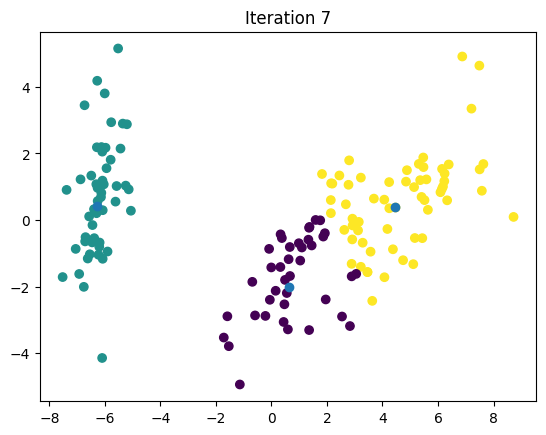

'"\ncentroids\nlabels.value_counts()\nplayers[labels == 0][["short_name"] + features]\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(3)\nkmeans.fit(data)\npd.DataFrame(kmeans.cluster_centers_, columns=features).T\n'

In [9]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

# 5 plot the centroids
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()
    
# 6 repeat until they stop changing
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
    
# prova
""""""""""
centroids
labels.value_counts()
players[labels == 0][["short_name"] + features]
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(data)
pd.DataFrame(kmeans.cluster_centers_, columns=features).T
"""""""""

# 2


Find an optimal number of clusters.




### Method 1: Elbow

The elbow method is the most widely used method for choosing the number of clusters. It runs clustering models for a range of cluster numbers and plots the within cluster sum of squares. The elbow on the plot shows the point where the diminishing returns for additional clusters happen.

C:\Users\Gabriele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gabriele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gabriele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

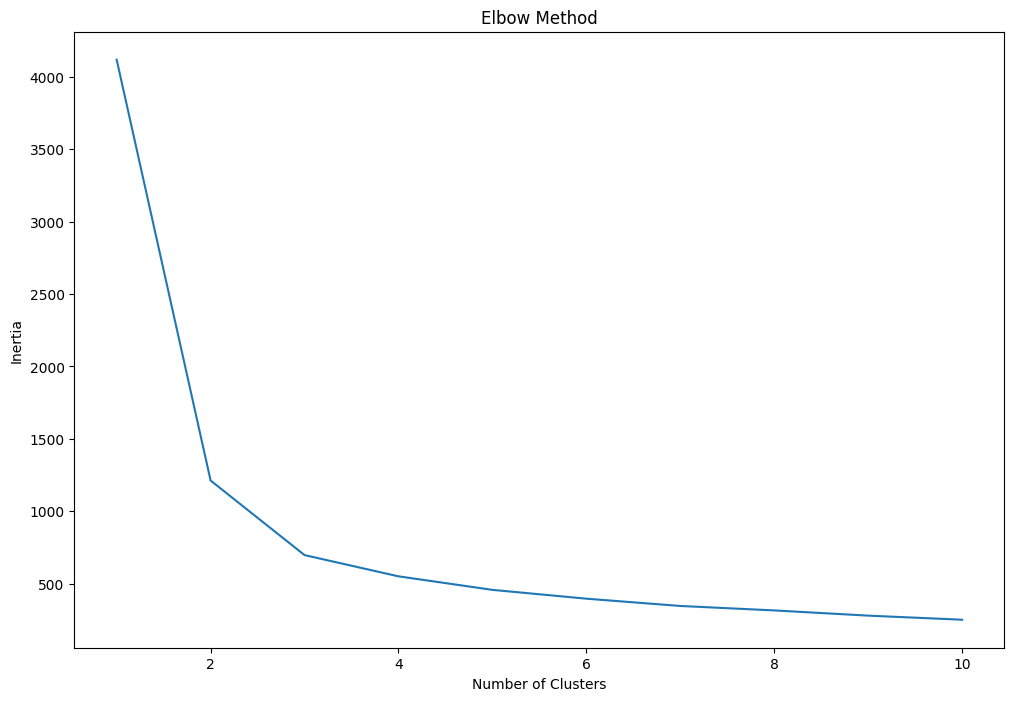

In [10]:
# Create an empty dictionary to save the within cluster sum of square values
inertia = {} 
# Look through the number of clusters
for i in range(1,11):
    # Run kmeans model
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
    #Sum of squared distances of samples to their closest cluster center.
    inertia[i] = (kmeans.inertia_)
    # Print the within cluster sum of squares for each cluster number
    #print(f'The within cluster sum of squares for {i} clusters is {wcss[i]:.2f}') 

# Visualization
plt.figure(figsize=(12,8))
plt.plot(list(inertia.keys()),list(inertia.values()))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Method 2: Hierarchical Graph

The y axis is the euclidean distance, so the longer the vertical line is, the larger distance between the clusters.

From the graph, we can see that the two clusters connected by the blue line have the largest distance, and the two sub-clusters in red have a relatively large distance too. Therefore, the hierarchical graph suggests 2 or 3 clusters as well.

Text(0, 0.5, 'Euclidean Distance')

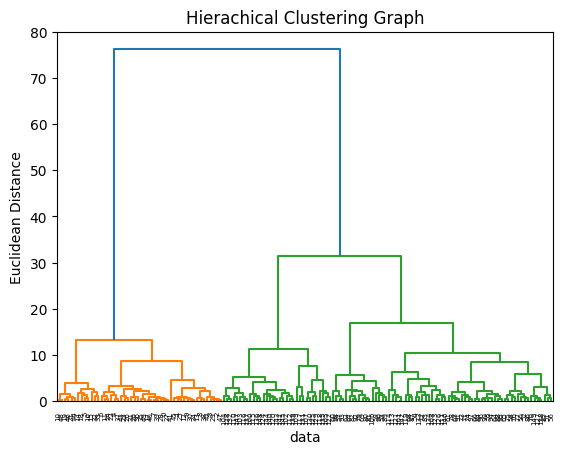

In [11]:
# Change figure size
#plt.figure(figsize=(16,12))
plt.figure()

# Fit the heirachical graph
heirachical_graph=hier.dendrogram(hier.linkage(data, method='ward')) #method='ward' uses the Ward variance minimization algorithm

# Add titles and labels
plt.title('Hierachical Clustering Graph')
plt.xlabel('data')
plt.ylabel('Euclidean Distance')

## Method 3: AIC and BIC from GMM

Both AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are metrics that measure the relative prediction errors of different models. The lower the value is, the better the model is.

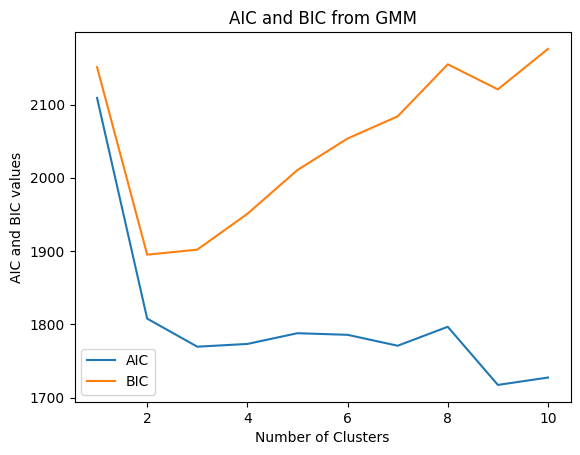

In [14]:
# Create empty dictionary for AIC and BIC values
aic_score = {} 
bic_score = {}

# Loop through different number of clusters
for i in range(1,11): 
  # Create Gaussian Mixture Model
  gmm = GaussianMixture(n_components=i, random_state=0).fit(data)
  # Get AIC score for the model
  aic_score[i] = gmm.aic(data)
  # Get BIC score for the model
  bic_score[i] = gmm.bic(data)

# Visualization
#plt.figure(figsize=(12,8))
plt.figure()
plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('AIC and BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC and BIC values')
plt.show()

# 3

Run the algorithm on the data obtained from the dimensionality reduction.

# 4

Implement K-means++ from scratch and explain the differences with the results you got earlier.

In [22]:
import numpy as np
import pandas as pd

def kmeans_plusplus_init(data, k):
    """
    Initialize K-means++ centroids.

    Parameters:
    - data: Input data as a Pandas DataFrame.
    - k: Number of clusters.

    Returns:
    - centroids: Initial centroids as a Pandas DataFrame.
    """
    # Choose the first centroid randomly from the data points
    centroids = [data.iloc[np.random.choice(data.shape[0])]]

    # Choose the remaining centroids using K-means++ method
    for _ in range(1, k):
        # Calculate distances from each data point to the nearest existing centroid
        distances = np.array([min(np.linalg.norm(point - np.array(centroid)) for centroid in centroids) for _, point in data.iterrows()])

        # Calculate probabilities for each data point based on squared distances
        probabilities = distances**2 / np.sum(distances**2)

        # Choose the next centroid randomly from the data points based on probabilities
        new_centroid = data.iloc[np.random.choice(data.shape[0], p=probabilities)]
        centroids.append(new_centroid)

    return pd.concat(centroids, axis=1)

# Example usage:
np.random.seed(42)  # for reproducibility
#data_points = pd.DataFrame(np.random.rand(100, 2))  # generate random 2D data as a DataFrame
num_clusters = 3

initial_centroids = kmeans_plusplus_init(data, num_clusters)
print("Initial Centroids:")
print(initial_centroids)



Initial Centroids:
                        102       57        14 
petal length (cm)  9.305085  4.898305  1.338983
petal width (cm)   9.333333  4.750000  1.416667
sepal length (cm)  8.777778  2.666667  5.166667
sepal width (cm)   5.166667  2.666667  9.333333


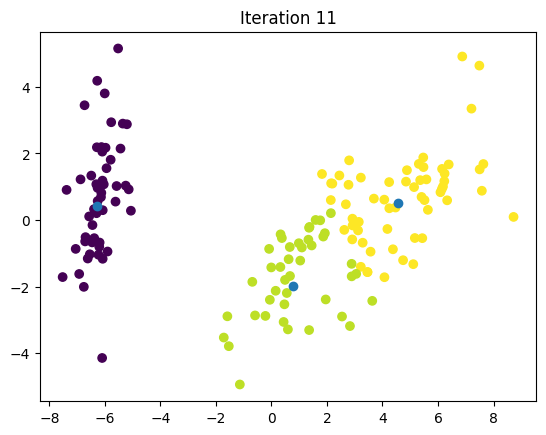

In [25]:
max_iterations = 100
centroid_count = 3

centroids = kmeans_plusplus_init(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

This implementation randomly selects the first centroid and then chooses the subsequent centroids with a probability proportional to the squared distance from the nearest existing centroid. This ensures that the initial centroids are well spread out in the data space.

K-means++ is typically used as the initialization step to provide better starting points for convergence.

# 5

Ask ChatGPT to recommend other clustering algorithms and choose one. Explain your choice, then ask ChatGPT to implement it or use already implemented versions (e.g., the one provided in the scikit-learn library) and run it on your data. Explain the differences (if there are any) in the results. Which one is the best, in your opinion, and why?